In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

In [2]:
# Load the dataset
data = pd.read_excel("Data/Telco_customer_churn.xlsx")

# Display first few rows
data.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
data.duplicated().sum()

np.int64(0)

### EDA

#### Demographic analysis

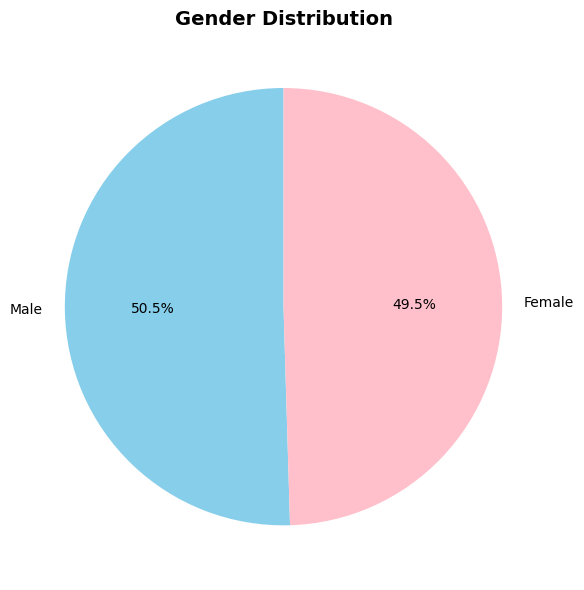

In [6]:
# Gender Distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'], legend=False)
plt.title("Gender Distribution", fontsize=14, fontweight='bold')
plt.ylabel('')  # Remove default ylabel
plt.tight_layout()
plt.show()

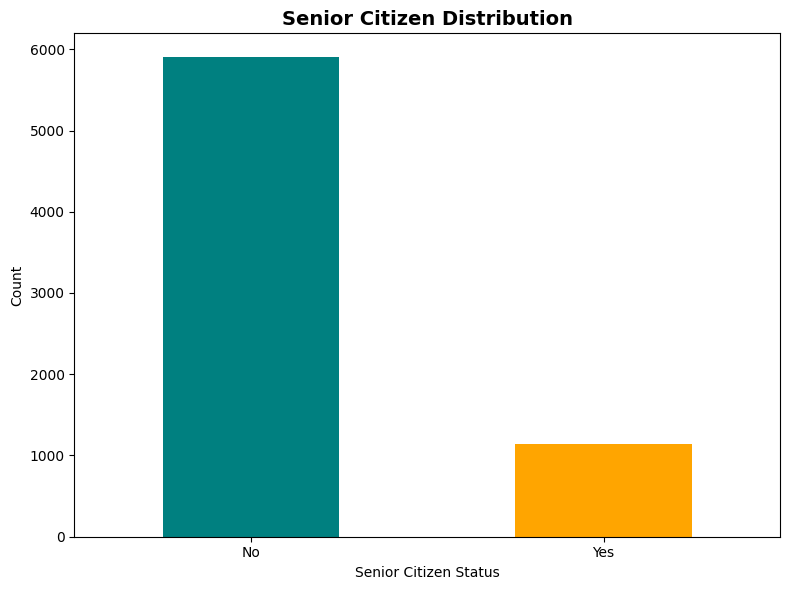

In [7]:
# Senior Citizen Distribution
senior_counts = data['Senior Citizen'].value_counts()
plt.figure(figsize=(8, 6))
senior_counts.plot(kind='bar', color=['teal', 'orange'])
plt.title("Senior Citizen Distribution", fontsize=14, fontweight='bold')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

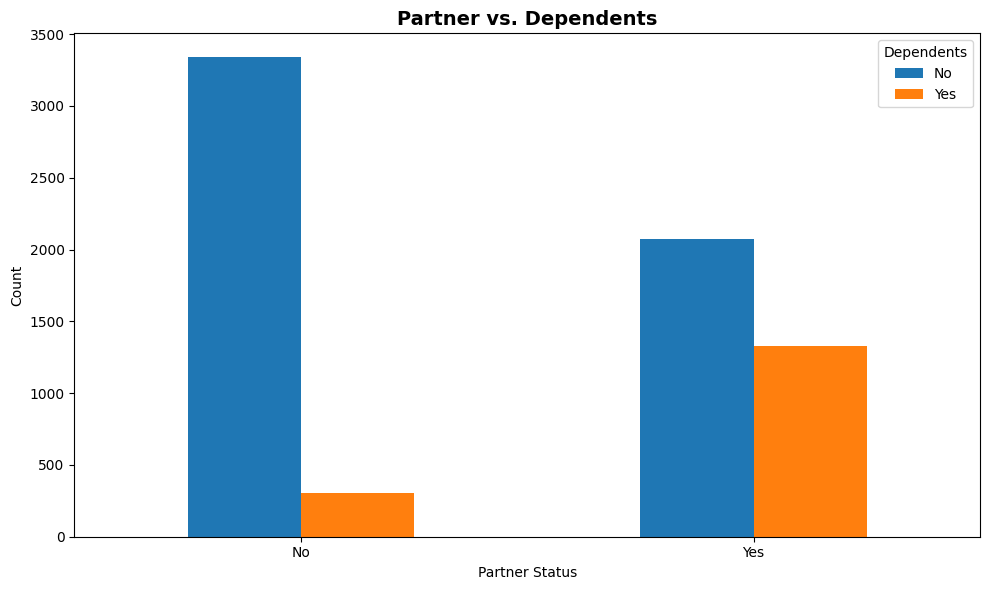

In [8]:
# Partner vs Dependents
partner_dependents = data.groupby(['Partner', 'Dependents']).size().unstack()
partner_dependents.plot(kind='bar', figsize=(10, 6))
plt.title("Partner vs. Dependents", fontsize=14, fontweight='bold')
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.legend(title='Dependents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

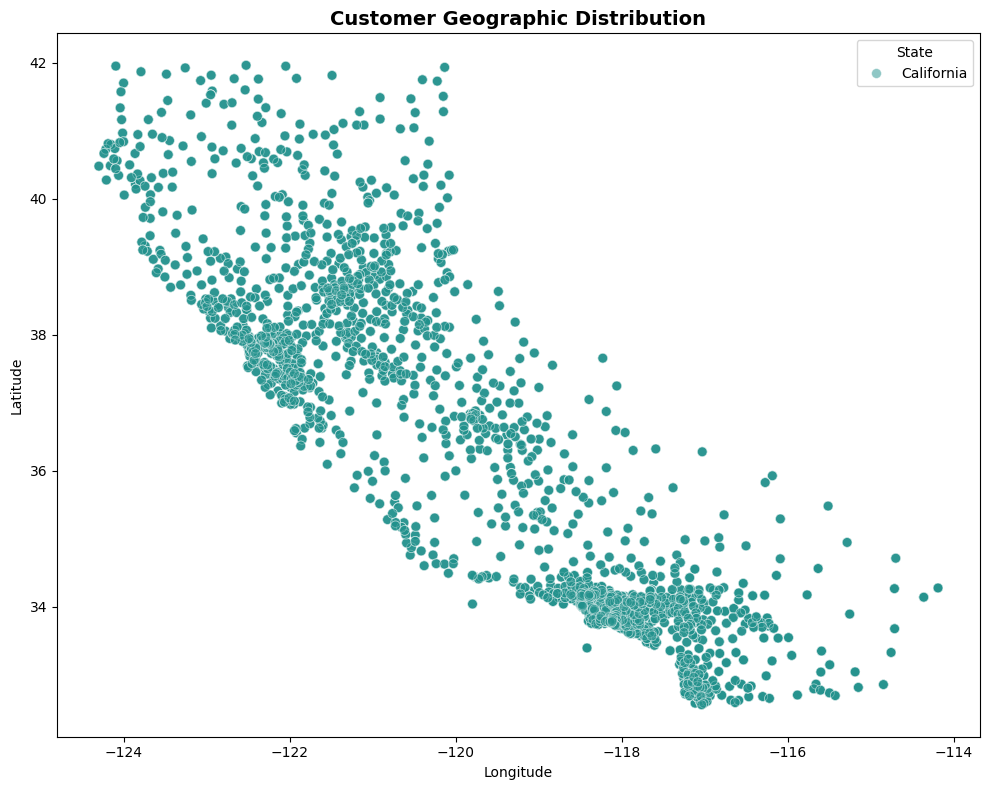

In [9]:
# Geographic Distribution
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], alpha=0.5, hue=data['State'], palette='viridis', s=50)
plt.title("Customer Geographic Distribution", fontsize=14, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

#### Service usage patterns

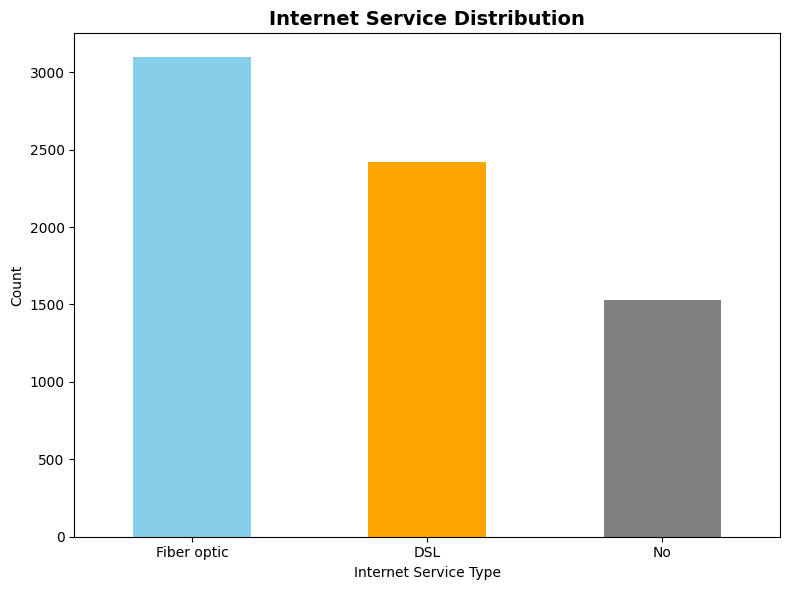

In [10]:
# Internet Service Distribution
internet_counts = data['Internet Service'].value_counts()
plt.figure(figsize=(8, 6))
internet_counts.plot(kind='bar', color=['skyblue', 'orange', 'gray'])
plt.title("Internet Service Distribution", fontsize=14, fontweight='bold')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

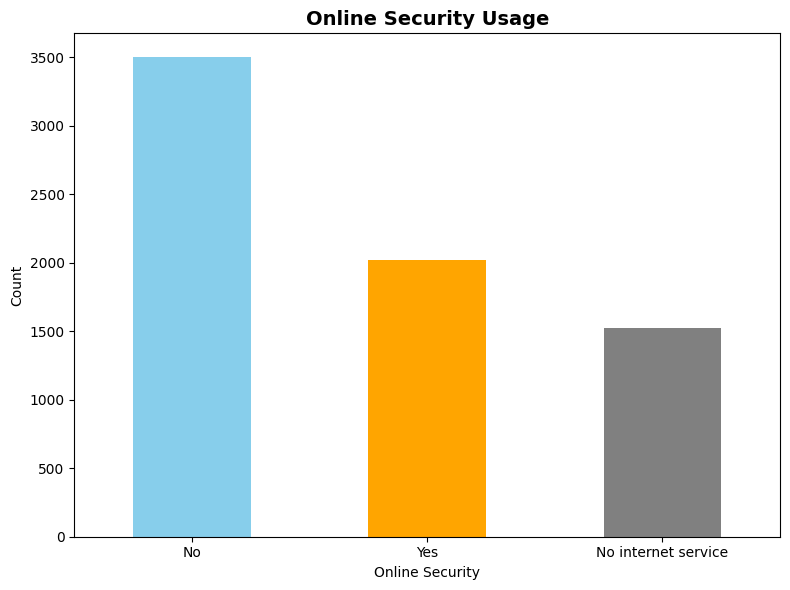

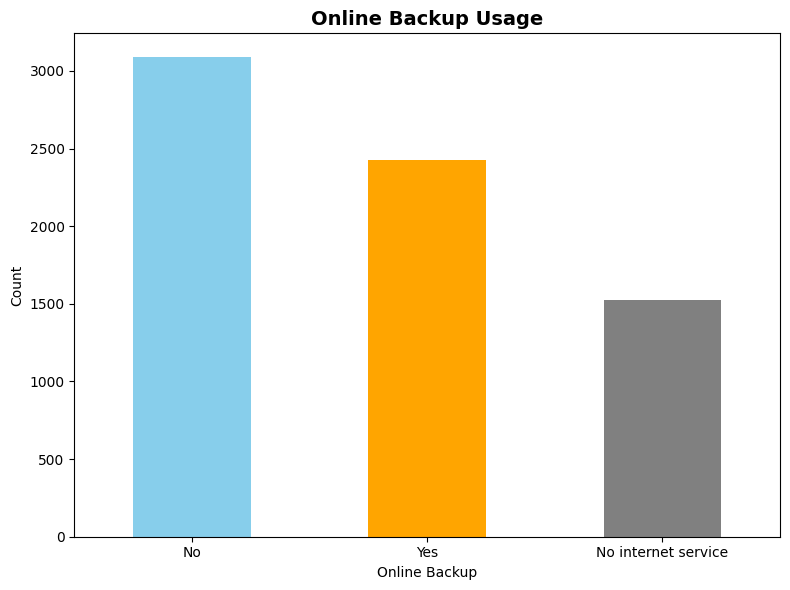

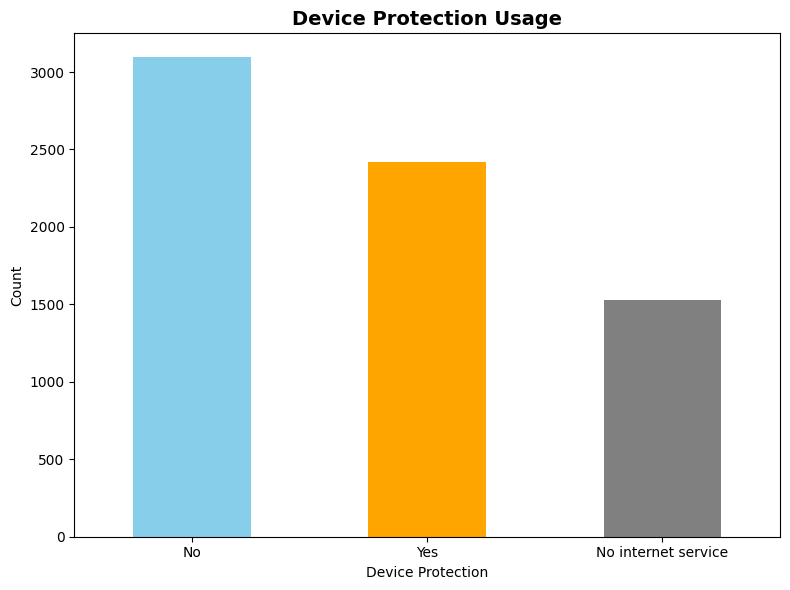

In [11]:
# Online Features Usage
online_features = ['Online Security', 'Online Backup', 'Device Protection']
for feature in online_features:
    feature_counts = data[feature].value_counts()
    plt.figure(figsize=(8, 6))
    feature_counts.plot(kind='bar', color=['skyblue', 'orange', 'gray'])
    plt.title(f"{feature} Usage", fontsize=14, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

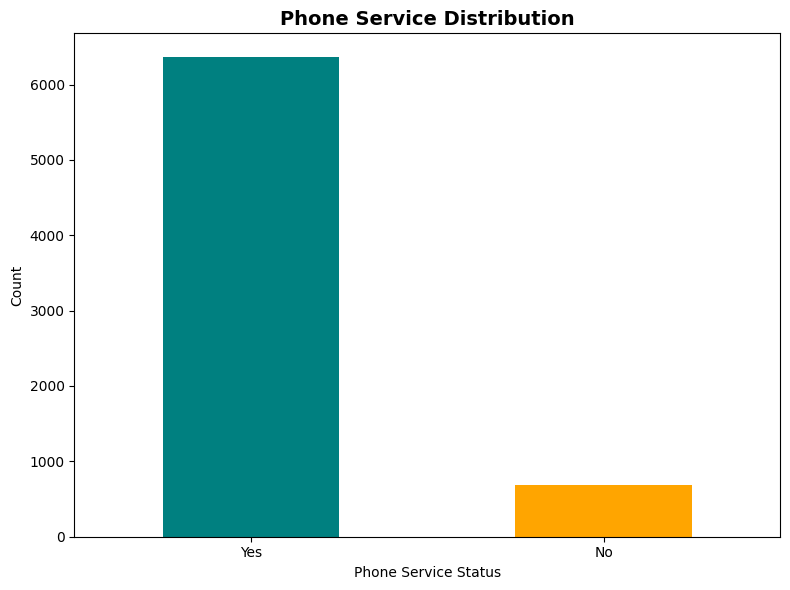

In [12]:
# Phone Service Distribution
phone_service_counts = data['Phone Service'].value_counts()
plt.figure(figsize=(8, 6))
phone_service_counts.plot(kind='bar', color=['teal', 'orange'])
plt.title("Phone Service Distribution", fontsize=14, fontweight='bold')
plt.xlabel('Phone Service Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Tenure and Churn Analysis

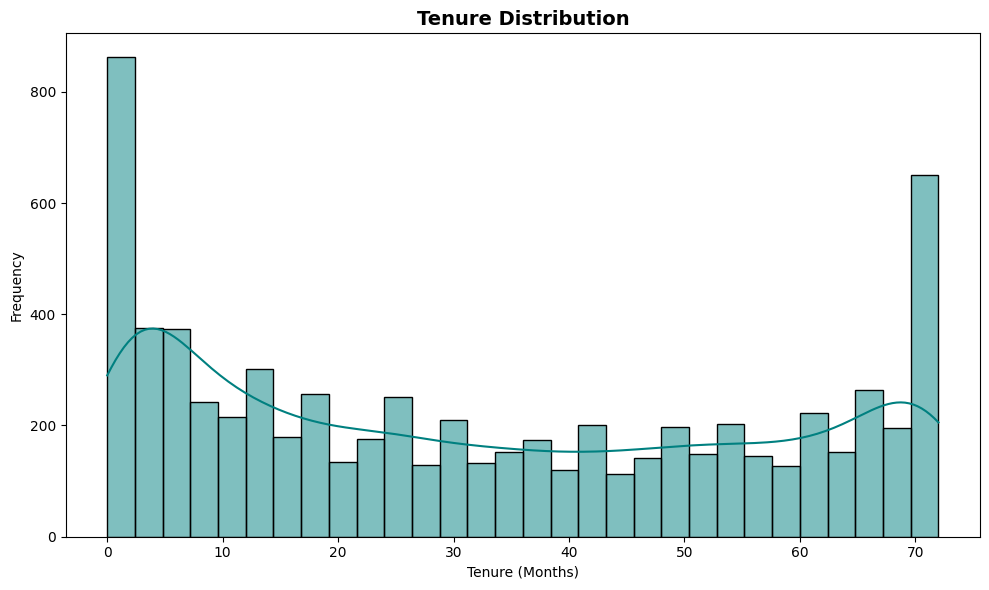

In [13]:
# Tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Tenure Months'], kde=True, bins=30, color='teal')
plt.title("Tenure Distribution", fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\621329092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Senior Citizen'], y=data['Tenure Months'], palette='viridis')


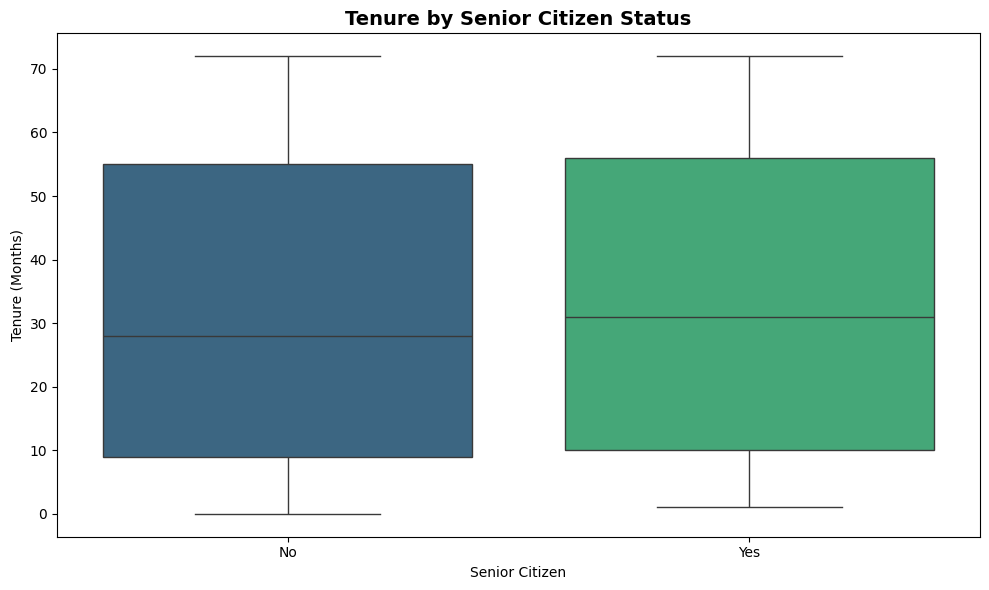

In [14]:
# Churn Rate by Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Senior Citizen'], y=data['Tenure Months'], palette='viridis')
plt.title("Tenure by Senior Citizen Status", fontsize=14, fontweight='bold')
plt.xlabel('Senior Citizen')
plt.ylabel('Tenure (Months)')
plt.tight_layout()
plt.show()

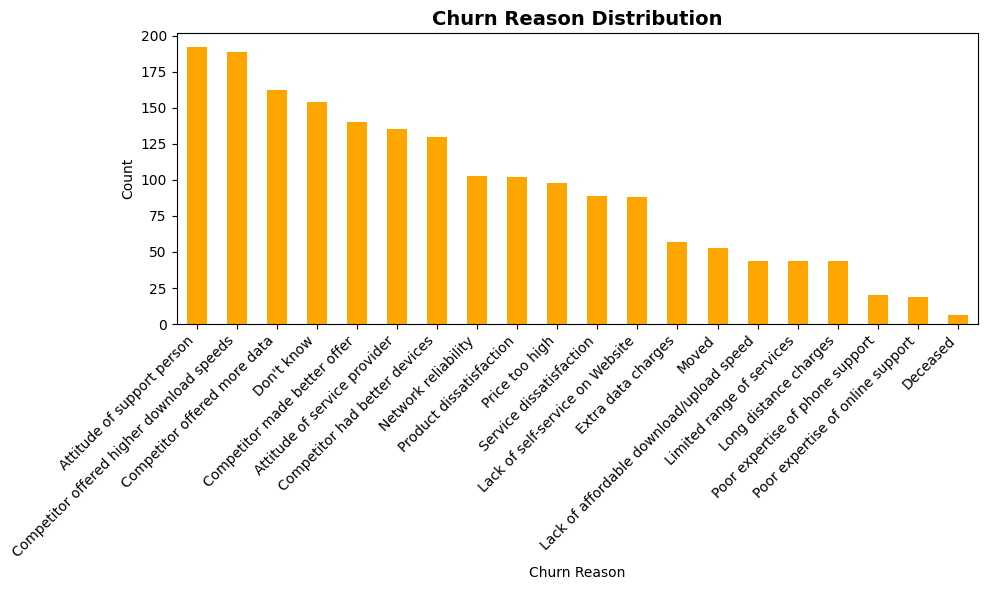

In [15]:
# Churn Reason Distribution
churn_reasons = data['Churn Reason'].value_counts()
plt.figure(figsize=(10, 6))
churn_reasons.plot(kind='bar', color='orange')
plt.title("Churn Reason Distribution", fontsize=14, fontweight='bold')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Financial Insights

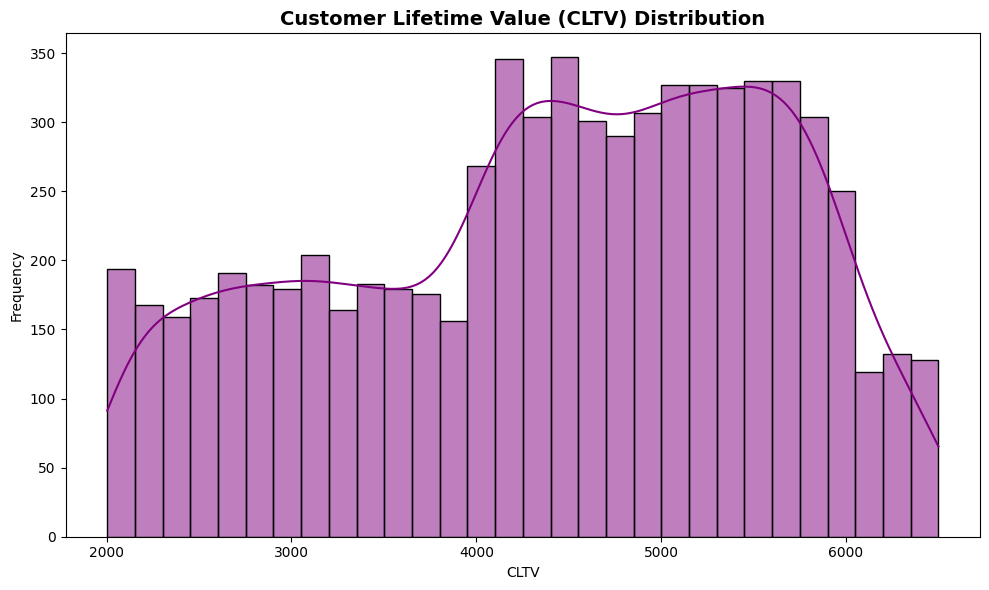

In [16]:
# CLTV Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['CLTV'], kde=True, bins=30, color='purple')
plt.title("Customer Lifetime Value (CLTV) Distribution", fontsize=14, fontweight='bold')
plt.xlabel('CLTV')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

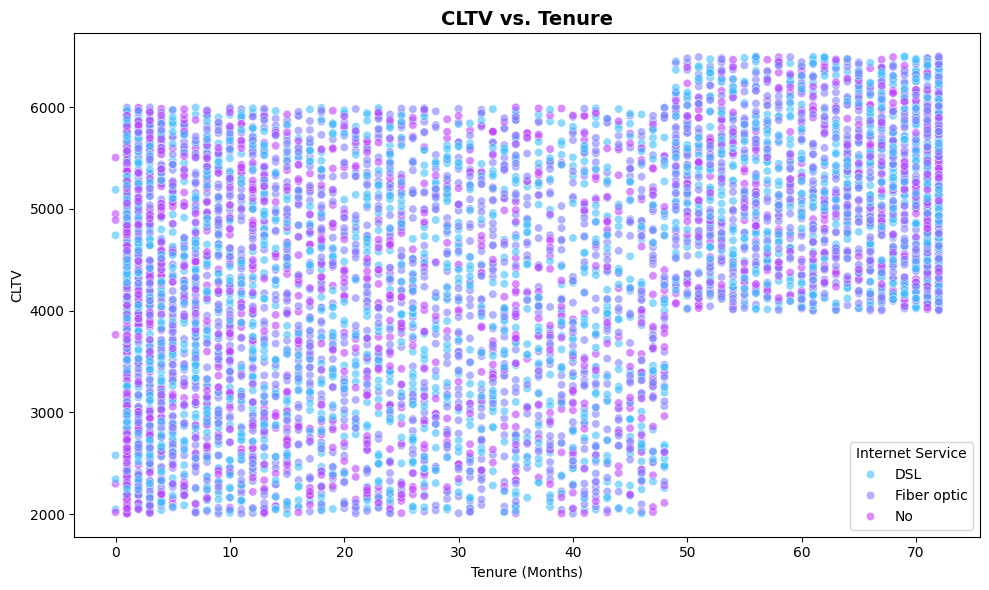

In [17]:
# CLTV vs Tenure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Tenure Months'], y=data['CLTV'], alpha=0.6, hue=data['Internet Service'], palette='cool')
plt.title("CLTV vs. Tenure", fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)')
plt.ylabel('CLTV')
plt.legend(title='Internet Service')
plt.tight_layout()
plt.show()

#### Customer Segmentation

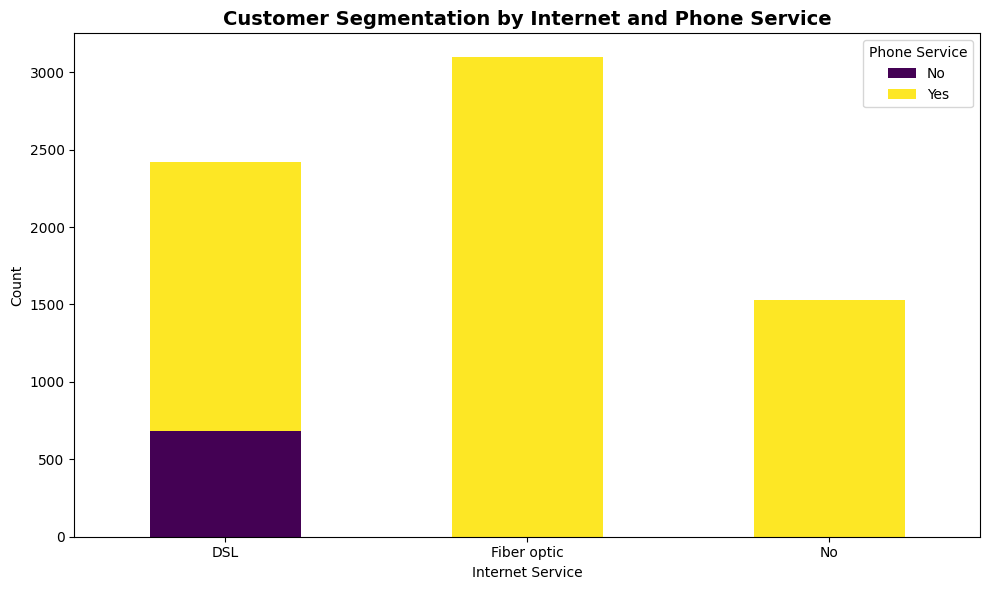

In [18]:
# Customer Segmentation by Service Usage
segmentation = data.groupby(['Internet Service', 'Phone Service']).size().unstack()
segmentation.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Customer Segmentation by Internet and Phone Service", fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Phone Service')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

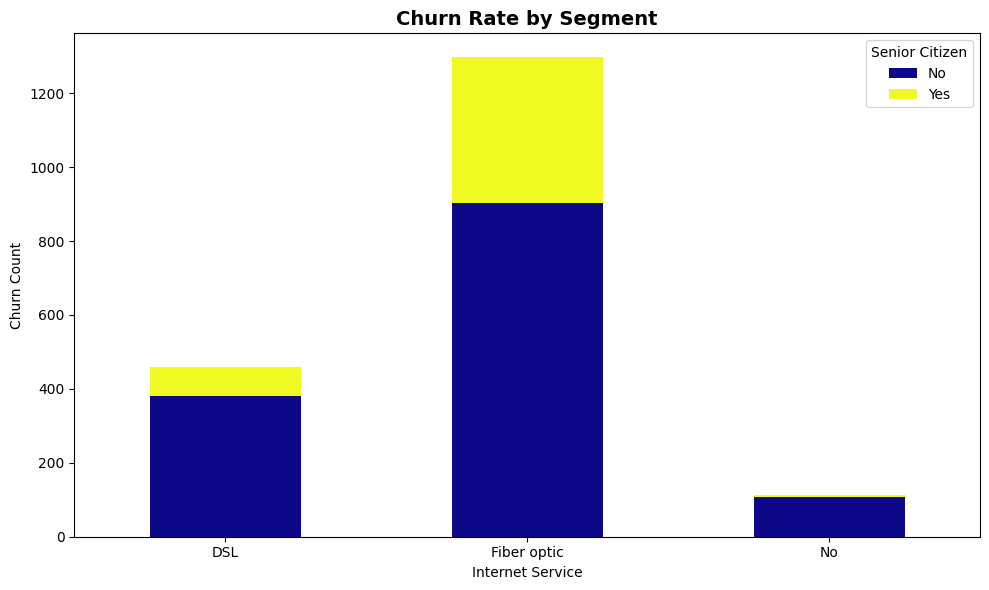

In [19]:
# Churn Rate by Segment
segment_churn = data.groupby(['Internet Service', 'Senior Citizen'])['Churn Reason'].count().unstack()
segment_churn.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title("Churn Rate by Segment", fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Churn Count')
plt.legend(title='Senior Citizen')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Geo-Spatial Insights

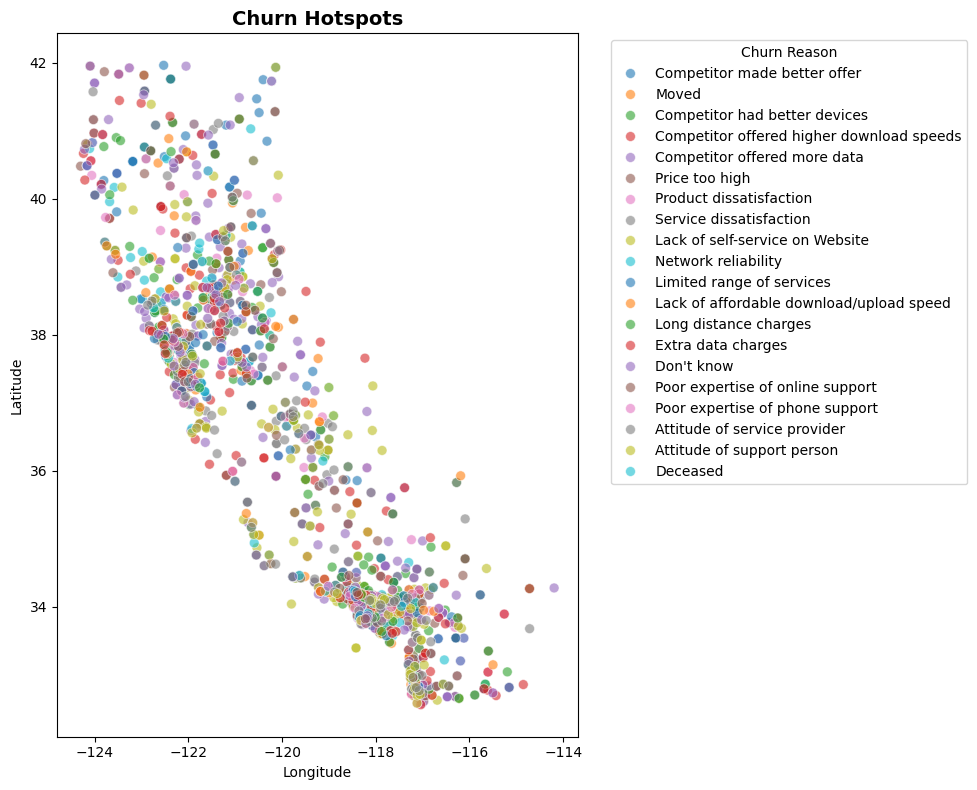

In [20]:
# Churn Hotspots
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], hue=data['Churn Reason'], alpha=0.6, palette='tab10', s=50)
plt.title("Churn Hotspots", fontsize=14, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Churn Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Correlation and Trends

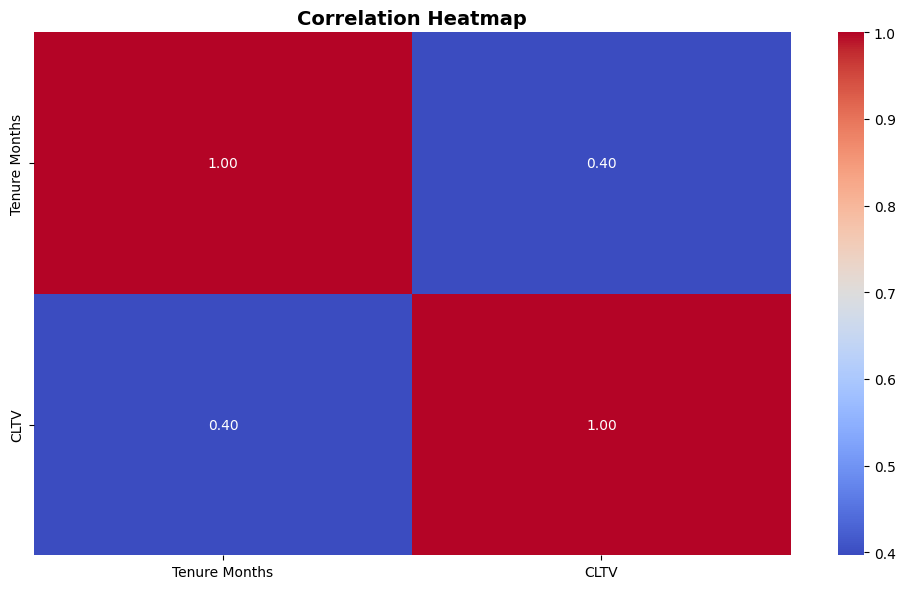

In [21]:
# Correlation Heatmap
numerical_cols = ['Tenure Months', 'CLTV']
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\588907338.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Online Security')


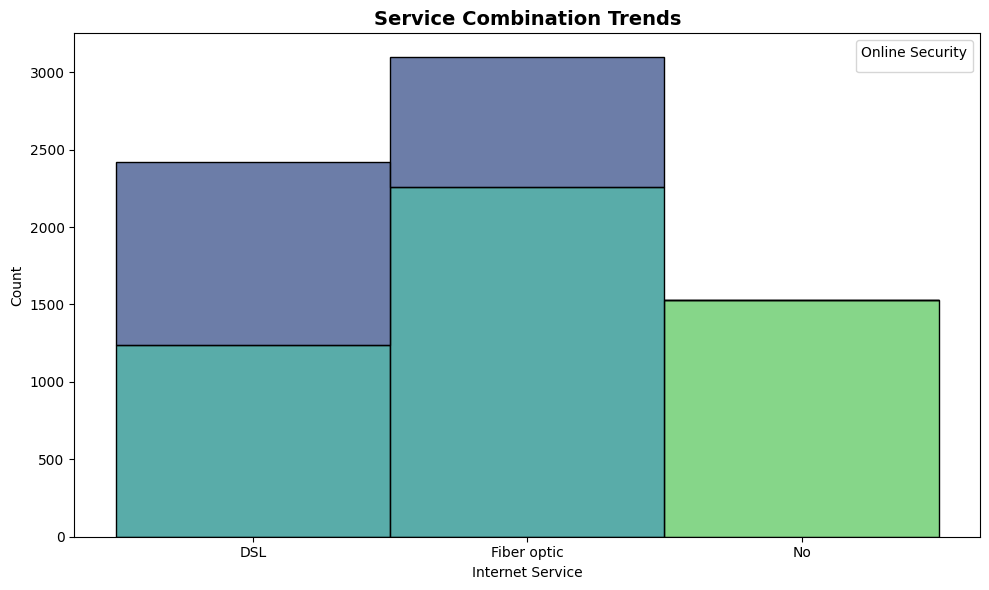

In [22]:
# Service Combination Trends
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Internet Service', hue='Online Security', multiple='stack', palette='viridis')
plt.title("Service Combination Trends", fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Online Security')
plt.tight_layout()
plt.show()

### Segmentation

In [23]:
# Segment customers by demographic attributes
demographic_segments = data.groupby(['Gender', 'Senior Citizen', 'Partner', 'Dependents']).size()
demographic_segments = demographic_segments.reset_index(name='Count')
print("Demographic Segments")
print(demographic_segments)

Demographic Segments
    Gender Senior Citizen Partner Dependents  Count
0   Female             No      No         No   1360
1   Female             No      No        Yes    120
2   Female             No     Yes         No    801
3   Female             No     Yes        Yes    639
4   Female            Yes      No         No    314
5   Female            Yes      No        Yes      6
6   Female            Yes     Yes         No    215
7   Female            Yes     Yes        Yes     33
8     Male             No      No         No   1421
9     Male             No      No        Yes    171
10    Male             No     Yes         No    765
11    Male             No     Yes        Yes    624
12    Male            Yes      No         No    244
13    Male            Yes      No        Yes      5
14    Male            Yes     Yes         No    296
15    Male            Yes     Yes        Yes     29


In [24]:
# Segment customers by service usage
service_segments = data.groupby(['Internet Service', 'Phone Service', 'Online Security']).size()
service_segments = service_segments.reset_index(name='Count')
print("Service Segments")
print(service_segments)

Service Segments
  Internet Service Phone Service      Online Security  Count
0              DSL            No                   No    399
1              DSL            No                  Yes    283
2              DSL           Yes                   No    842
3              DSL           Yes                  Yes    897
4      Fiber optic           Yes                   No   2257
5      Fiber optic           Yes                  Yes    839
6               No           Yes  No internet service   1526


In [25]:
# Segment customers by churn reasons
churn_segments = data.groupby(['Churn Reason', 'Internet Service', 'Senior Citizen']).size()
churn_segments = churn_segments.reset_index(name='Count')
print("Churn Segments")
print(churn_segments)

Churn Segments
                    Churn Reason Internet Service Senior Citizen  Count
0   Attitude of service provider              DSL             No     25
1   Attitude of service provider              DSL            Yes      4
2   Attitude of service provider      Fiber optic             No     67
3   Attitude of service provider      Fiber optic            Yes     34
4   Attitude of service provider               No             No      5
..                           ...              ...            ...    ...
95       Service dissatisfaction              DSL             No     14
96       Service dissatisfaction              DSL            Yes      5
97       Service dissatisfaction      Fiber optic             No     49
98       Service dissatisfaction      Fiber optic            Yes     15
99       Service dissatisfaction               No             No      6

[100 rows x 4 columns]


In [26]:
# Segment customers by tenure duration
data['Tenure Group'] = pd.cut(data['Tenure Months'], bins=[0, 12, 36, 60, 72], labels=['0-1 Year', '1-3 Years', '3-5 Years', '5+ Years'])
tenure_segments = data.groupby('Tenure Group').size().reset_index(name='Count')
print("Tenure Segments")
print(tenure_segments)

Tenure Segments
  Tenure Group  Count
0     0-1 Year   2175
1    1-3 Years   1856
2    3-5 Years   1594
3     5+ Years   1407


C:\Users\viren\AppData\Local\Temp\ipykernel_34700\3141330987.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_segments = data.groupby('Tenure Group').size().reset_index(name='Count')


In [27]:
# Segment customers by state and city
geo_segments = data.groupby(['State', 'City']).size().reset_index(name='Count')
print("Geographic Segments")
print(geo_segments)

Geographic Segments
           State          City  Count
0     California        Acampo      4
1     California         Acton      4
2     California      Adelanto      5
3     California          Adin      4
4     California  Agoura Hills      5
...          ...           ...    ...
1124  California         Yreka      4
1125  California     Yuba City      8
1126  California       Yucaipa      4
1127  California  Yucca Valley      5
1128  California         Zenia      4

[1129 rows x 3 columns]


In [28]:
# Segment customers into low, medium, and high CLTV
data['CLTV Segment'] = pd.cut(data['CLTV'], bins=[0, 3000, 7000, 10000], labels=['Low', 'Medium', 'High'])
cltv_segments = data.groupby('CLTV Segment').size().reset_index(name='Count')
print("CLTV Segments")
print(cltv_segments)

CLTV Segments
  CLTV Segment  Count
0          Low   1182
1       Medium   5861
2         High      0


C:\Users\viren\AppData\Local\Temp\ipykernel_34700\4086271673.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_segments = data.groupby('CLTV Segment').size().reset_index(name='Count')


In [29]:
# Combine all segmentation results into a single table for presentation
combined_insights = {
    "Demographic Segments": demographic_segments,
    "Service Segments": service_segments,
    "Churn Segments": churn_segments,
    "Tenure Segments": tenure_segments,
    "Geographic Segments": geo_segments,
    "CLTV Segments": cltv_segments,
}

# Display all insights in a user-friendly format
for segment_name, segment_data in combined_insights.items():
    # Display the segment name as a title
    display(Markdown(f"### {segment_name}"))
    # Display the dataframe
    display(segment_data)

### Demographic Segments

,Gender,Senior Citizen,Partner,Dependents,Count
0,Female,No,No,No,1360
1,Female,No,No,Yes,120
2,Female,No,Yes,No,801
3,Female,No,Yes,Yes,639
4,Female,Yes,No,No,314
5,Female,Yes,No,Yes,6
6,Female,Yes,Yes,No,215
7,Female,Yes,Yes,Yes,33
8,Male,No,No,No,1421
9,Male,No,No,Yes,171


### Service Segments

,Internet Service,Phone Service,Online Security,Count
0,DSL,No,No,399
1,DSL,No,Yes,283
2,DSL,Yes,No,842
3,DSL,Yes,Yes,897
4,Fiber optic,Yes,No,2257
5,Fiber optic,Yes,Yes,839
6,No,Yes,No internet service,1526


### Churn Segments

,Churn Reason,Internet Service,Senior Citizen,Count
0,Attitude of service provider,DSL,No,25
1,Attitude of service provider,DSL,Yes,4
2,Attitude of service provider,Fiber optic,No,67
3,Attitude of service provider,Fiber optic,Yes,34
4,Attitude of service provider,No,No,5
...,...,...,...,...
95,Service dissatisfaction,DSL,No,14
96,Service dissatisfaction,DSL,Yes,5
97,Service dissatisfaction,Fiber optic,No,49
98,Service dissatisfaction,Fiber optic,Yes,15


### Tenure Segments

,Tenure Group,Count
0,0-1 Year,2175
1,1-3 Years,1856
2,3-5 Years,1594
3,5+ Years,1407


### Geographic Segments

,State,City,Count
0,California,Acampo,4
1,California,Acton,4
2,California,Adelanto,5
3,California,Adin,4
4,California,Agoura Hills,5
...,...,...,...
1124,California,Yreka,4
1125,California,Yuba City,8
1126,California,Yucaipa,4
1127,California,Yucca Valley,5


### CLTV Segments

,CLTV Segment,Count
0,Low,1182
1,Medium,5861
2,High,0


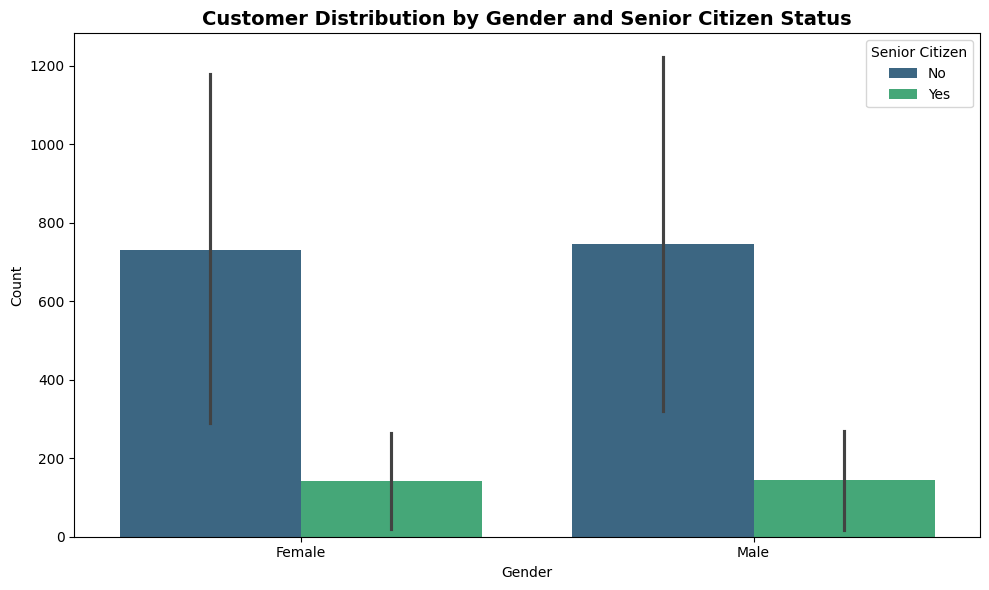

In [30]:
# Demographic Segments Visualization
demographic_segments = data.groupby(['Gender', 'Senior Citizen', 'Partner', 'Dependents']).size().reset_index(name='Count')

# Stacked Bar Chart for Gender and Senior Citizen
plt.figure(figsize=(10, 6))
sns.barplot(data=demographic_segments, x='Gender', y='Count', hue='Senior Citizen', palette='viridis')
plt.title("Customer Distribution by Gender and Senior Citizen Status", fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Senior Citizen')
plt.tight_layout()
plt.show()

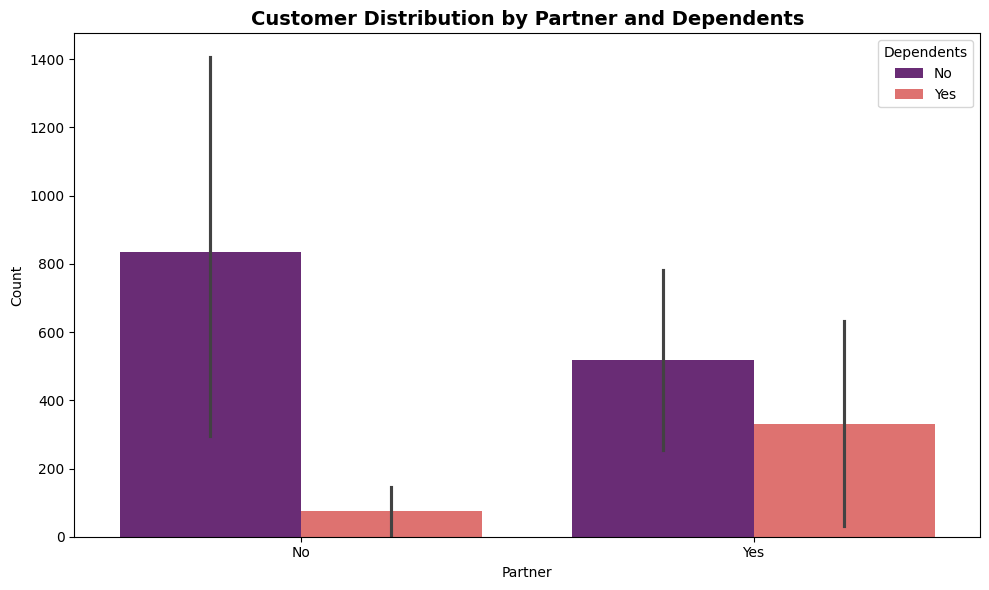

In [31]:
# Clustered Bar Chart for Partner and Dependents
plt.figure(figsize=(10, 6))
sns.barplot(data=demographic_segments, x='Partner', y='Count', hue='Dependents', palette='magma')
plt.title("Customer Distribution by Partner and Dependents", fontsize=14, fontweight='bold')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Dependents')
plt.tight_layout()
plt.show()

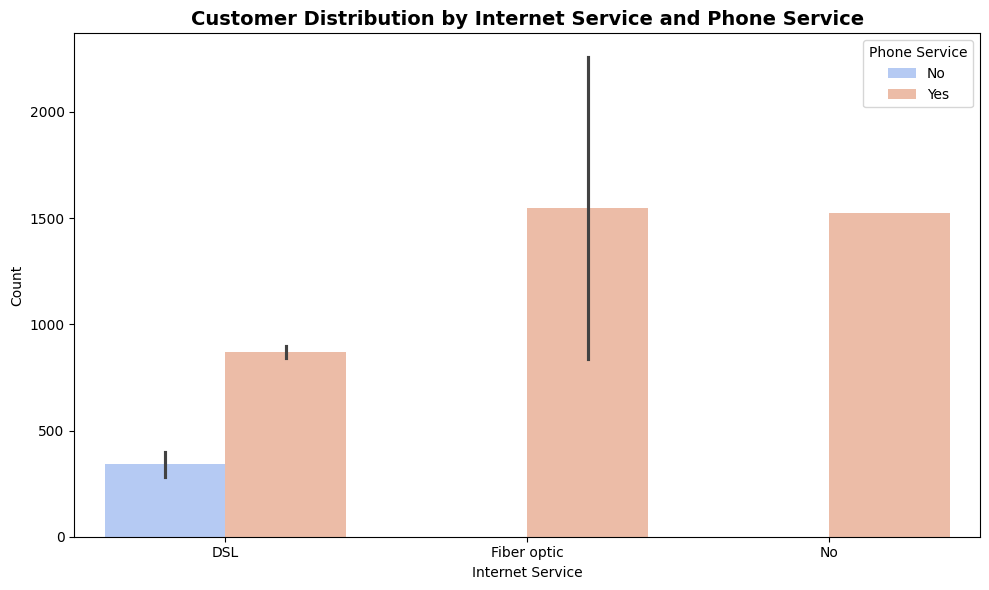

In [32]:
# Service Segments Visualization
service_segments = data.groupby(['Internet Service', 'Phone Service', 'Online Security']).size().reset_index(name='Count')

# Stacked Bar Chart for Internet Service and Phone Service
plt.figure(figsize=(10, 6))
sns.barplot(data=service_segments, x='Internet Service', y='Count', hue='Phone Service', palette='coolwarm')
plt.title("Customer Distribution by Internet Service and Phone Service", fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Phone Service')
plt.tight_layout()
plt.show()

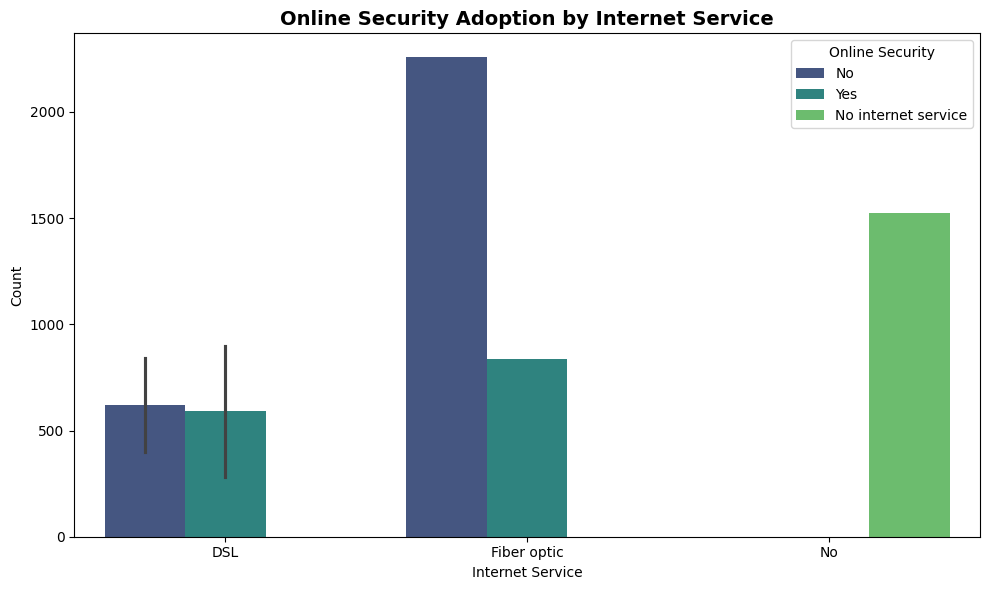

In [33]:
# Grouped Bar Chart for Online Security across Internet Services
plt.figure(figsize=(10, 6))
sns.barplot(data=service_segments, x='Internet Service', y='Count', hue='Online Security', palette='viridis')
plt.title("Online Security Adoption by Internet Service", fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Online Security')
plt.tight_layout()
plt.show()

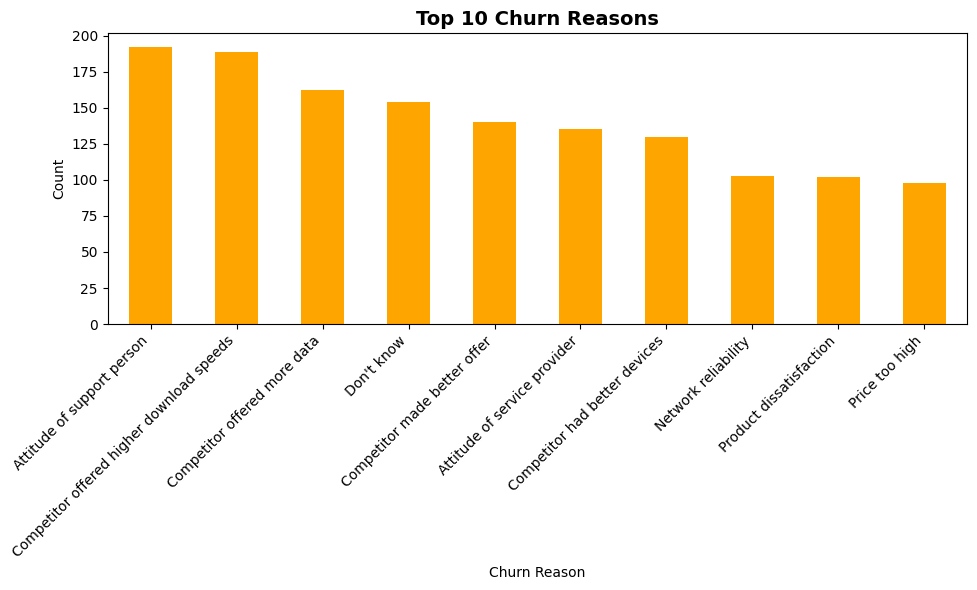

In [37]:
# Churn Segments Visualization
churn_segments = data.groupby(['Churn Reason', 'Internet Service', 'Senior Citizen', 'Churn Label']).size().reset_index(name='Count')

# Bar Chart for Top Churn Reasons
top_churn_reasons = churn_segments.groupby('Churn Reason')['Count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_churn_reasons.plot(kind='bar', color='orange')
plt.title("Top 10 Churn Reasons", fontsize=14, fontweight='bold')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

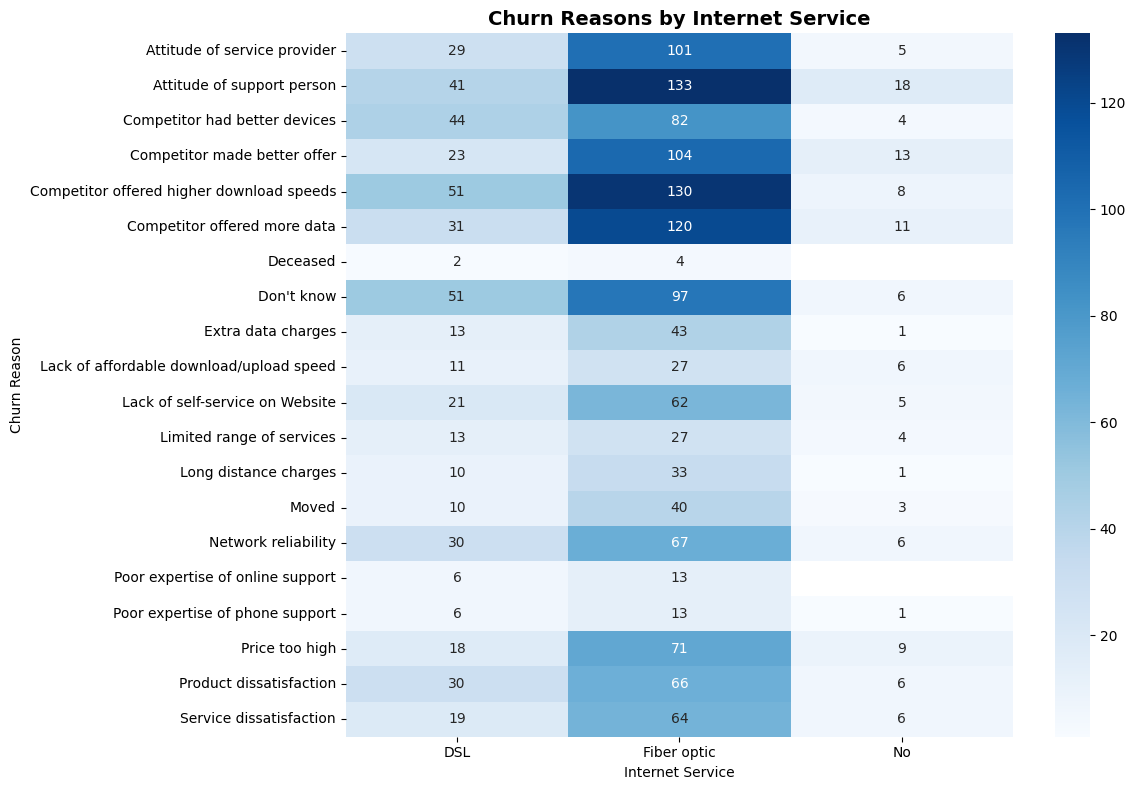

In [38]:
# Heatmap for Churn Reasons by Internet Service and Senior Citizen
churn_pivot = churn_segments.pivot_table(index='Churn Reason', columns='Internet Service', values='Count', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(churn_pivot, annot=True, cmap='Blues', fmt='.0f')
plt.title("Churn Reasons by Internet Service", fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Churn Reason')
plt.tight_layout()
plt.show()

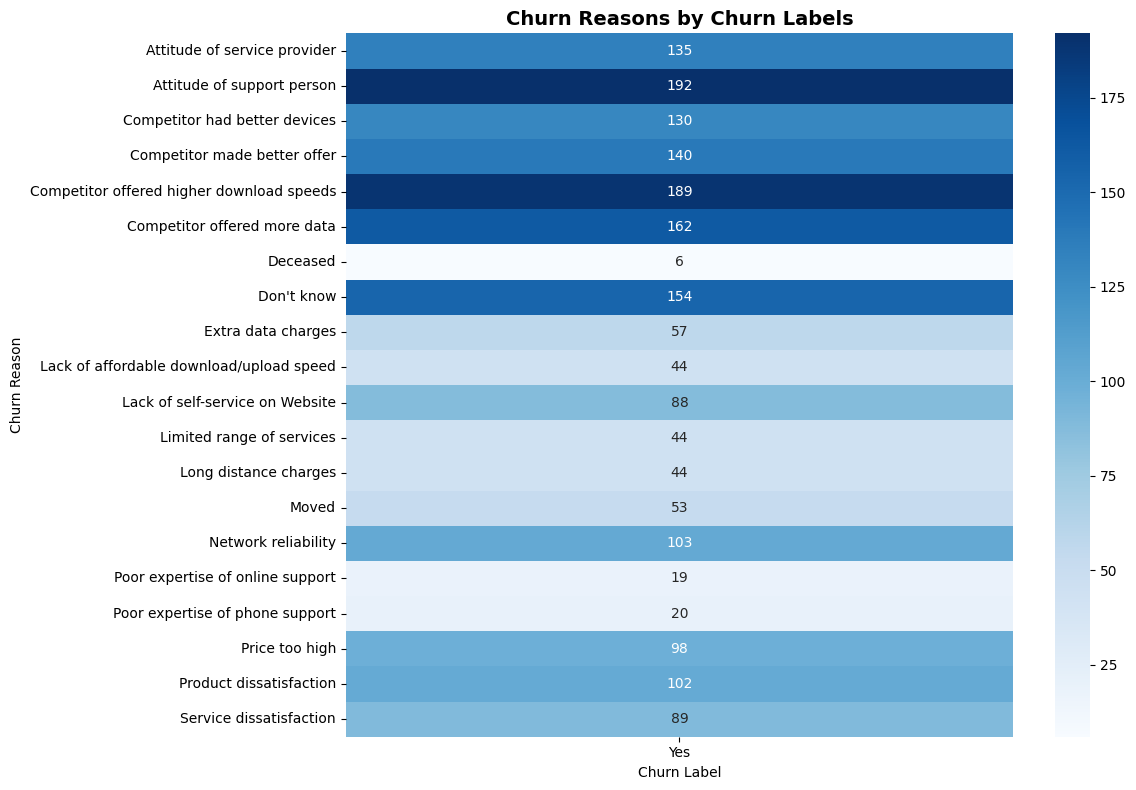

In [40]:
# Heatmap for Churn Reasons by Internet Service and Senior Citizen
churn_pivot = churn_segments.pivot_table(index='Churn Reason', columns='Churn Label', values='Count', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(churn_pivot, annot=True, cmap='Blues', fmt='.0f')
plt.title("Churn Reasons by Churn Labels", fontsize=14, fontweight='bold')
plt.xlabel('Churn Label')
plt.ylabel('Churn Reason')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\3725204092.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_segments = data.groupby('Tenure Group').size().reset_index(name='Count')
C:\Users\viren\AppData\Local\Temp\ipykernel_34700\3725204092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tenure_segments, x='Tenure Group', y='Count', palette='pastel')


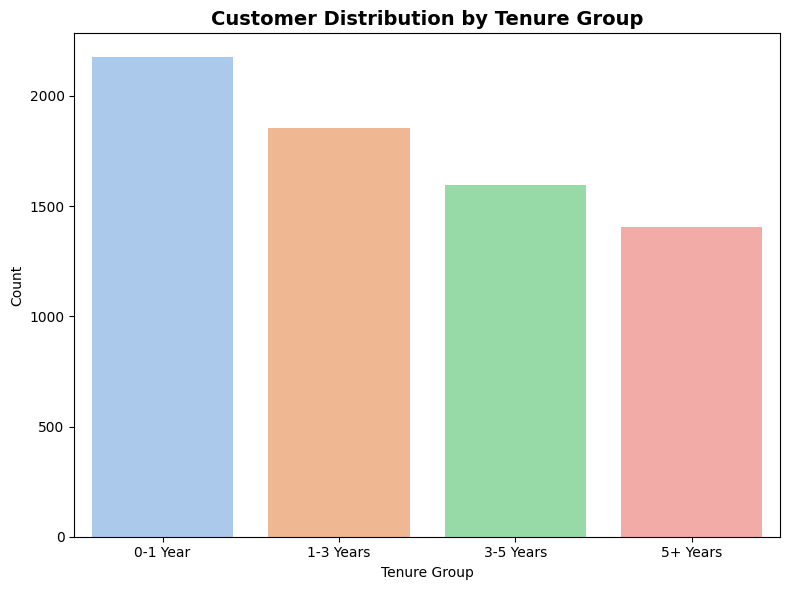

In [41]:
# Tenure Segments Visualization
tenure_segments = data.groupby('Tenure Group').size().reset_index(name='Count')

# Bar Chart for Tenure Group Distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=tenure_segments, x='Tenure Group', y='Count', palette='pastel')
plt.title("Customer Distribution by Tenure Group", fontsize=14, fontweight='bold')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\315441512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Count', palette='cool')


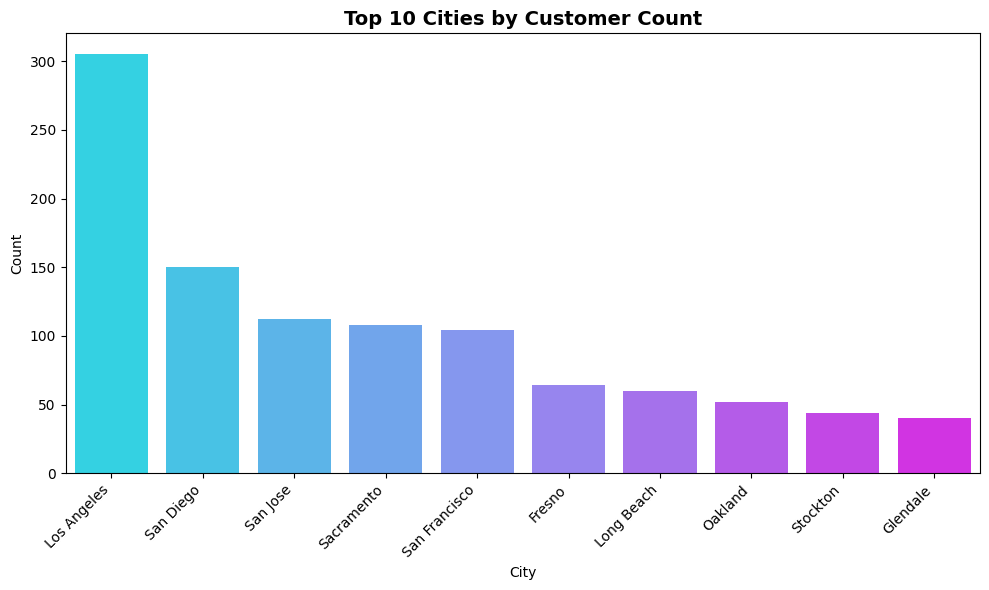

In [43]:
# Geographic Segments Visualization
geo_segments = data.groupby(['State', 'City']).size().reset_index(name='Count')

# Bar Chart for Top 10 Cities by Customer Count
top_cities = geo_segments.sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, x='City', y='Count', palette='cool')
plt.title("Top 10 Cities by Customer Count", fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

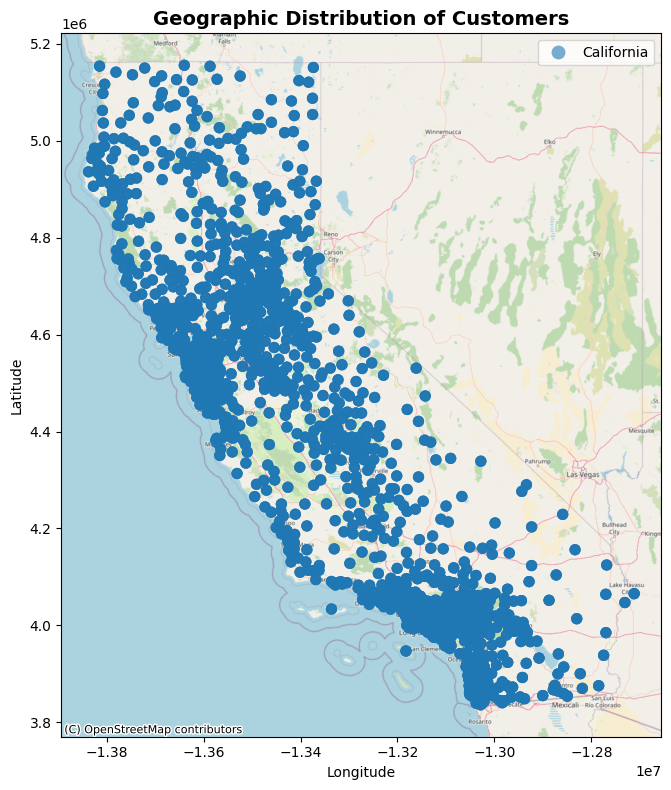

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Convert data into a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
geo_data = geo_data.set_crs(epsg=4326)

# Convert CRS to Web Mercator (EPSG:3857) for mapping
geo_data = geo_data.to_crs(epsg=3857)a

# Plot with a basemap
fig, ax = plt.subplots(figsize=(12, 8))
geo_data.plot(ax=ax, column='State', cmap='tab10', alpha=0.6, markersize=50, legend=True)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Add a basemap
plt.title("Geographic Distribution of Customers", fontsize=14, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\3912934230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='CLTV Segment', y='Tenure Months', palette='cool')


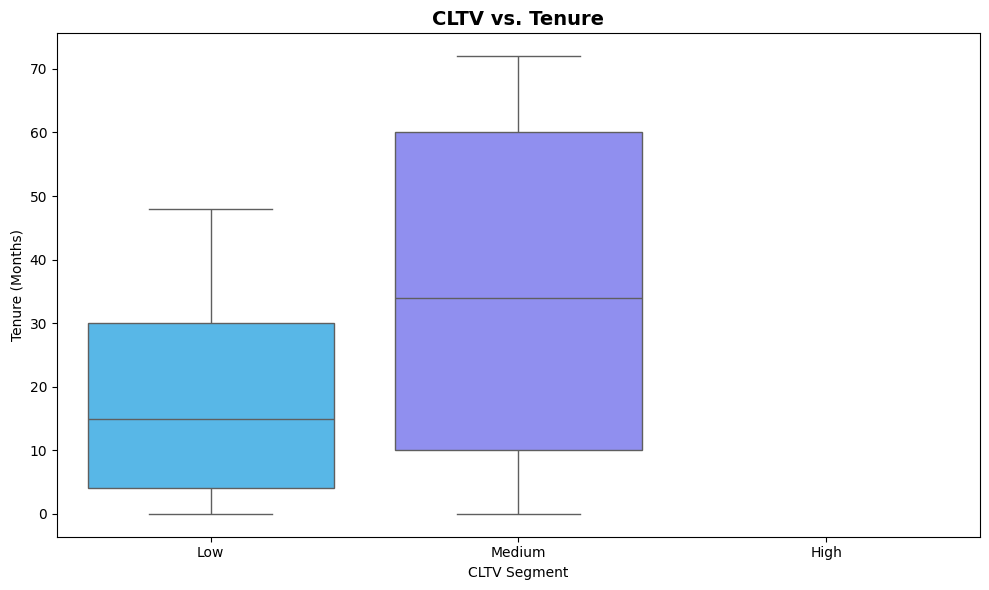

In [46]:
# Box Plot for CLTV vs Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='CLTV Segment', y='Tenure Months', palette='cool')
plt.title("CLTV vs. Tenure", fontsize=14, fontweight='bold')
plt.xlabel('CLTV Segment')
plt.ylabel('Tenure (Months)')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\3803640624.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_cltv_tenure = data.groupby(['Churn Reason', 'CLTV Segment', 'Tenure Group']).size().reset_index(name='Count')


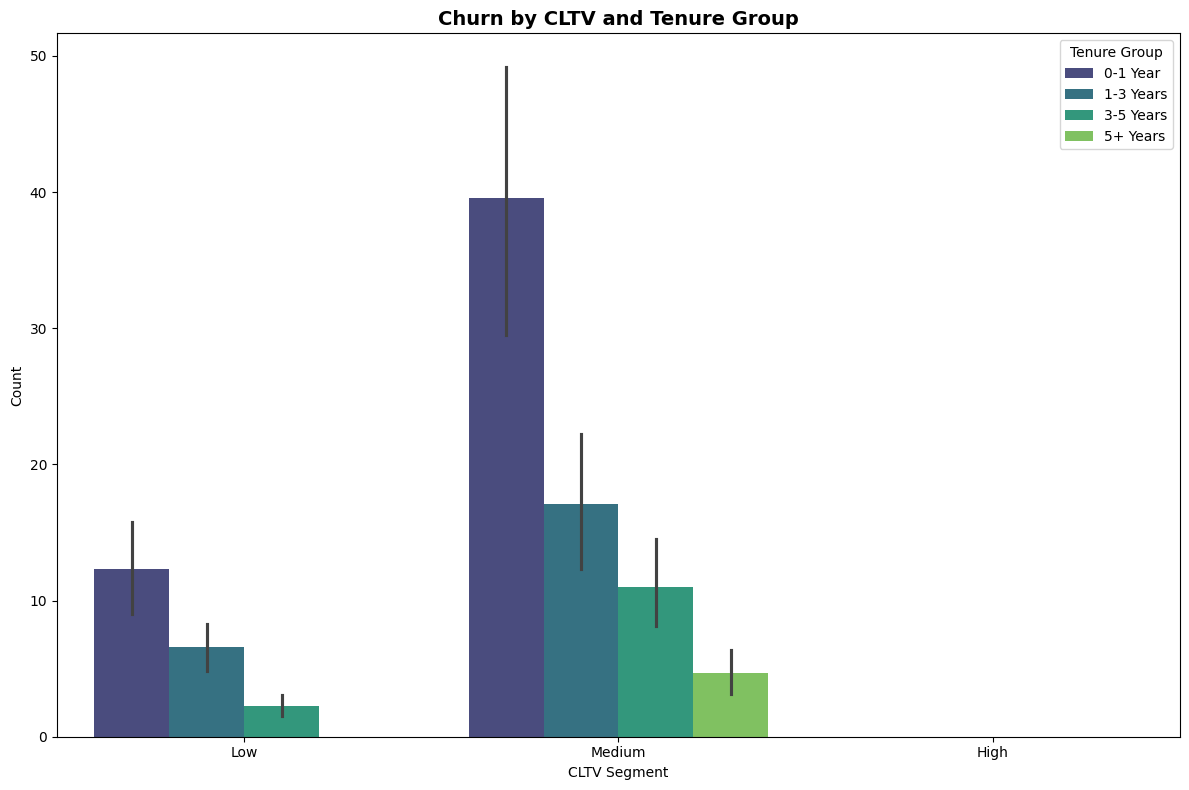

In [48]:
# Churn by CLTV and Tenure
churn_cltv_tenure = data.groupby(['Churn Reason', 'CLTV Segment', 'Tenure Group']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=churn_cltv_tenure, x='CLTV Segment', y='Count', hue='Tenure Group', palette='viridis')
plt.title("Churn by CLTV and Tenure Group", fontsize=14, fontweight='bold')
plt.xlabel('CLTV Segment')
plt.ylabel('Count')
plt.legend(title='Tenure Group')
plt.tight_layout()
plt.show()

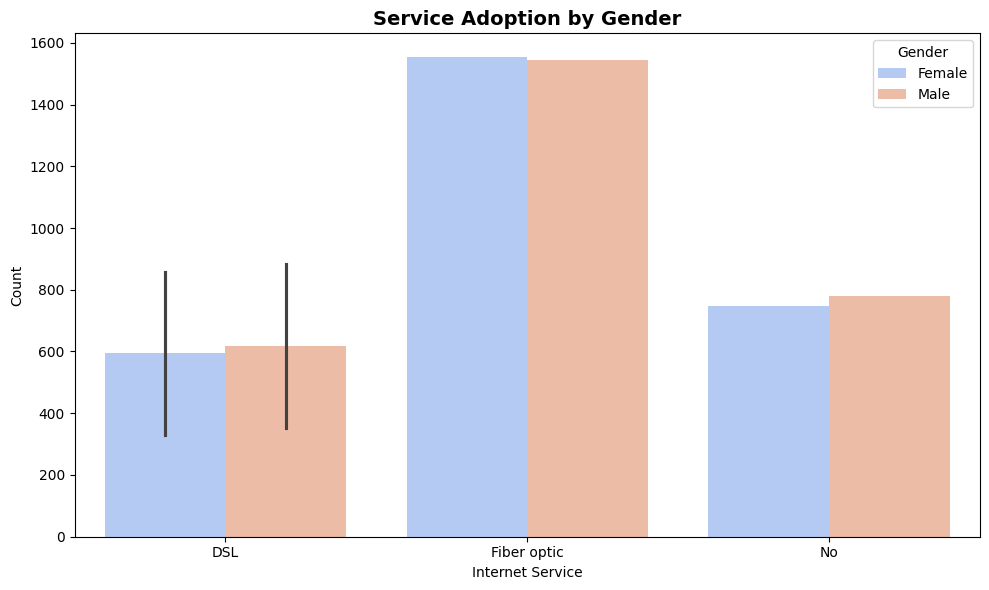

In [49]:
# Service Adoption by Demographics
service_adoption = data.groupby(['Gender', 'Internet Service', 'Phone Service']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=service_adoption, x='Internet Service', y='Count', hue='Gender', palette='coolwarm')
plt.title("Service Adoption by Gender", fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\4106008631.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_tenure_service = data.groupby(['Churn Reason', 'Tenure Group', 'Internet Service']).size().reset_index(name='Count')


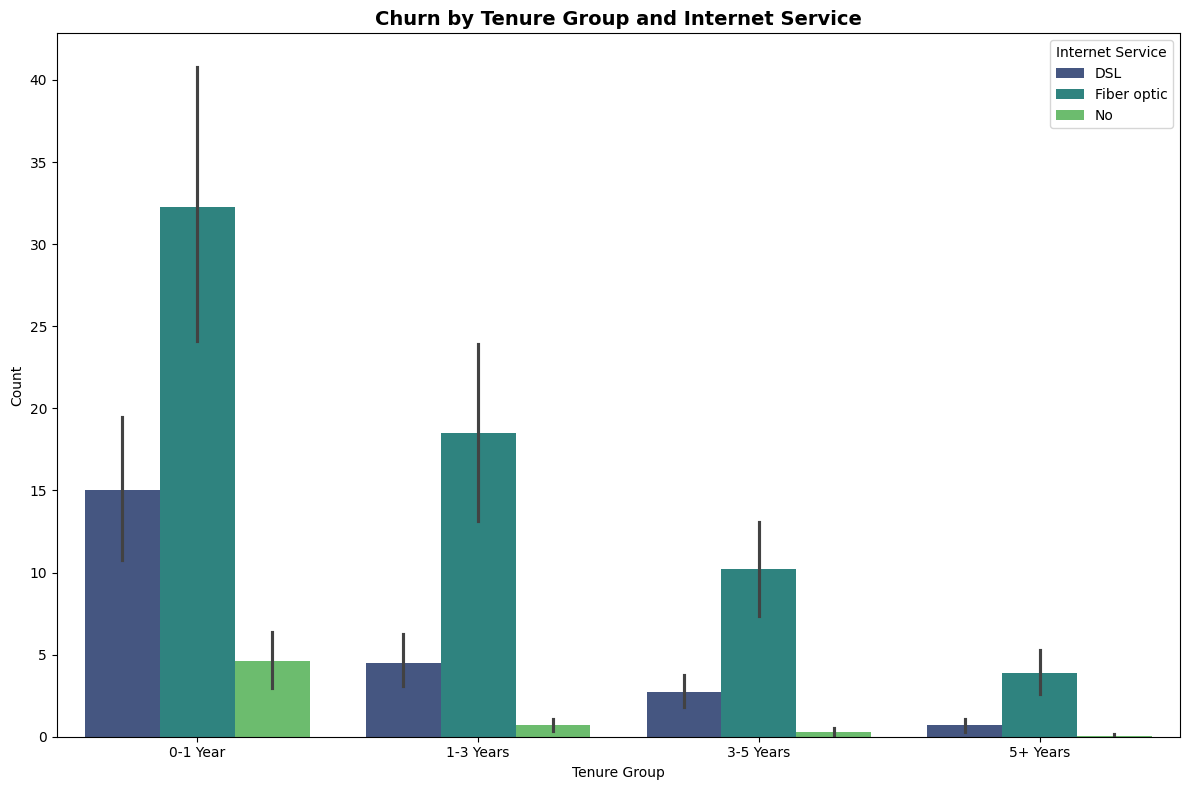

In [50]:
# Churn by Tenure and Internet Service
churn_tenure_service = data.groupby(['Churn Reason', 'Tenure Group', 'Internet Service']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=churn_tenure_service, x='Tenure Group', y='Count', hue='Internet Service', palette='viridis')
plt.title("Churn by Tenure Group and Internet Service", fontsize=14, fontweight='bold')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.legend(title='Internet Service')
plt.tight_layout()
plt.show()


C:\Users\viren\AppData\Local\Temp\ipykernel_34700\311986681.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_cltv, x='City', y='CLTV', palette='magma')


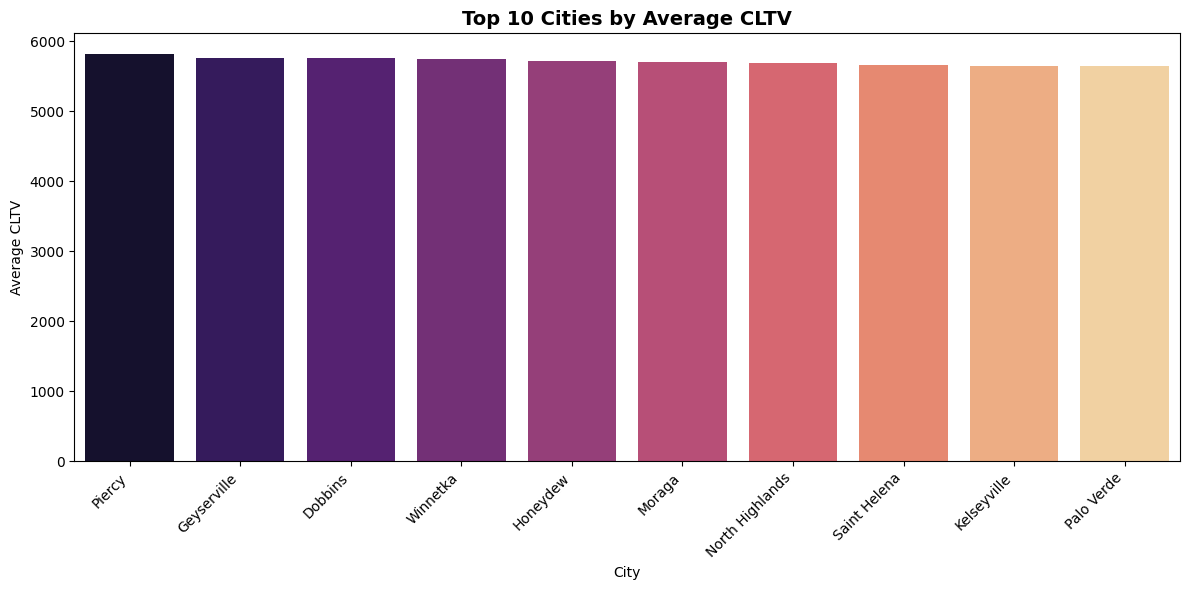

In [51]:
# CLTV by Geographic Region
geo_cltv = data.groupby(['State', 'City'])['CLTV'].mean().reset_index()
top_cities_cltv = geo_cltv.sort_values(by='CLTV', ascending=False).head(10)

# Bar Chart for Top 10 Cities by Average CLTV
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities_cltv, x='City', y='CLTV', palette='magma')
plt.title("Top 10 Cities by Average CLTV", fontsize=14, fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average CLTV')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\2296706175.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_tenure_reason = data.groupby(['Churn Reason', 'Tenure Group']).size().reset_index(name='Count')


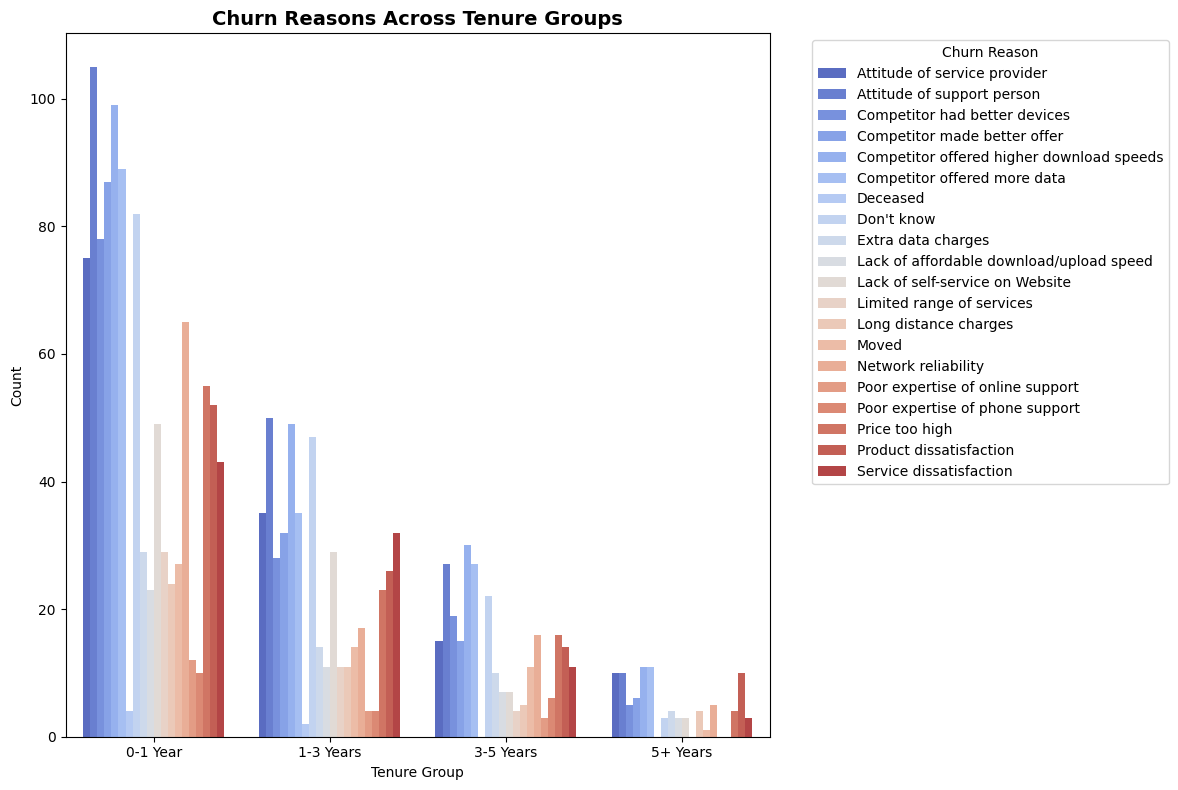

In [52]:
# Churn Reasons by Tenure Group
churn_tenure_reason = data.groupby(['Churn Reason', 'Tenure Group']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=churn_tenure_reason, x='Tenure Group', y='Count', hue='Churn Reason', palette='coolwarm')
plt.title("Churn Reasons Across Tenure Groups", fontsize=14, fontweight='bold')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.legend(title='Churn Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\550532124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_cltv = data.groupby(['CLTV Segment', 'Internet Service', 'Online Security']).size().reset_index(name='Count')


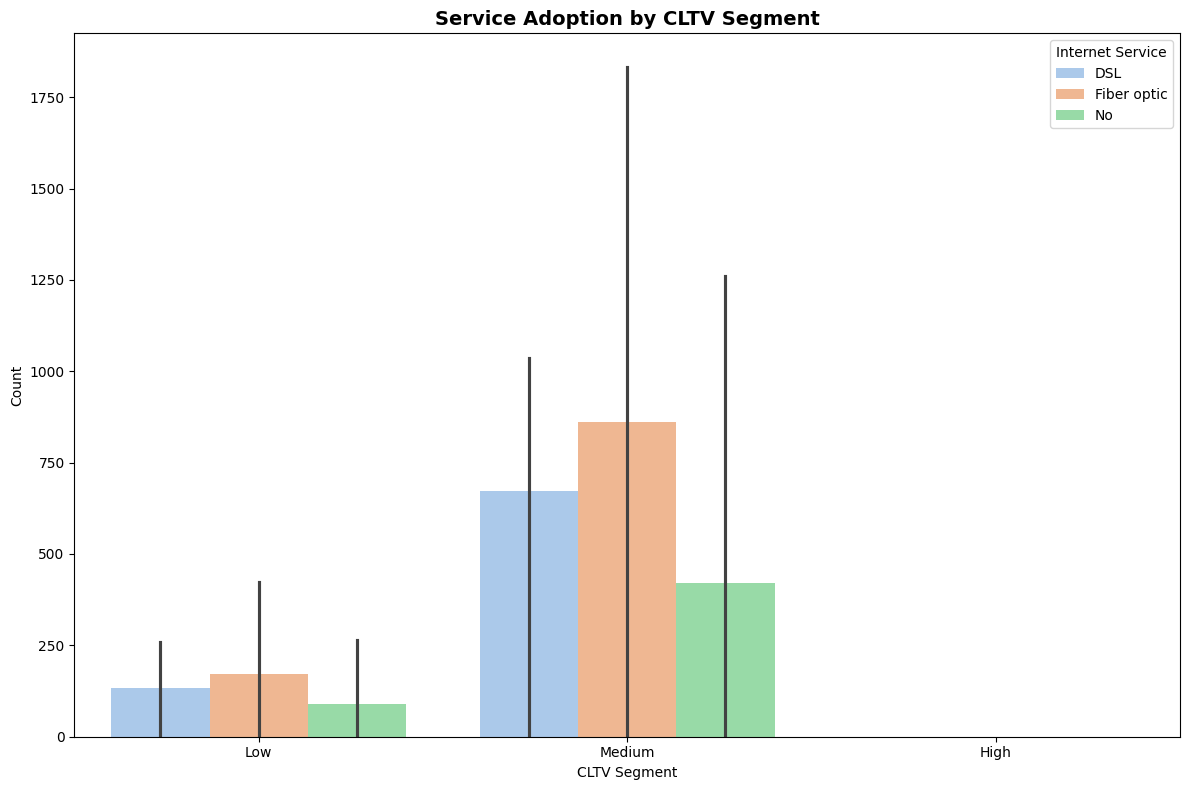

In [53]:
# Service Adoption by CLTV Segment
service_cltv = data.groupby(['CLTV Segment', 'Internet Service', 'Online Security']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=service_cltv, x='CLTV Segment', y='Count', hue='Internet Service', palette='pastel')
plt.title("Service Adoption by CLTV Segment", fontsize=14, fontweight='bold')
plt.xlabel('CLTV Segment')
plt.ylabel('Count')
plt.legend(title='Internet Service')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\1299319353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  senior_churn_cltv = data[data['Senior Citizen'] == 'Yes'].groupby(['Churn Reason', 'CLTV Segment']).size().reset_index(name='Count')


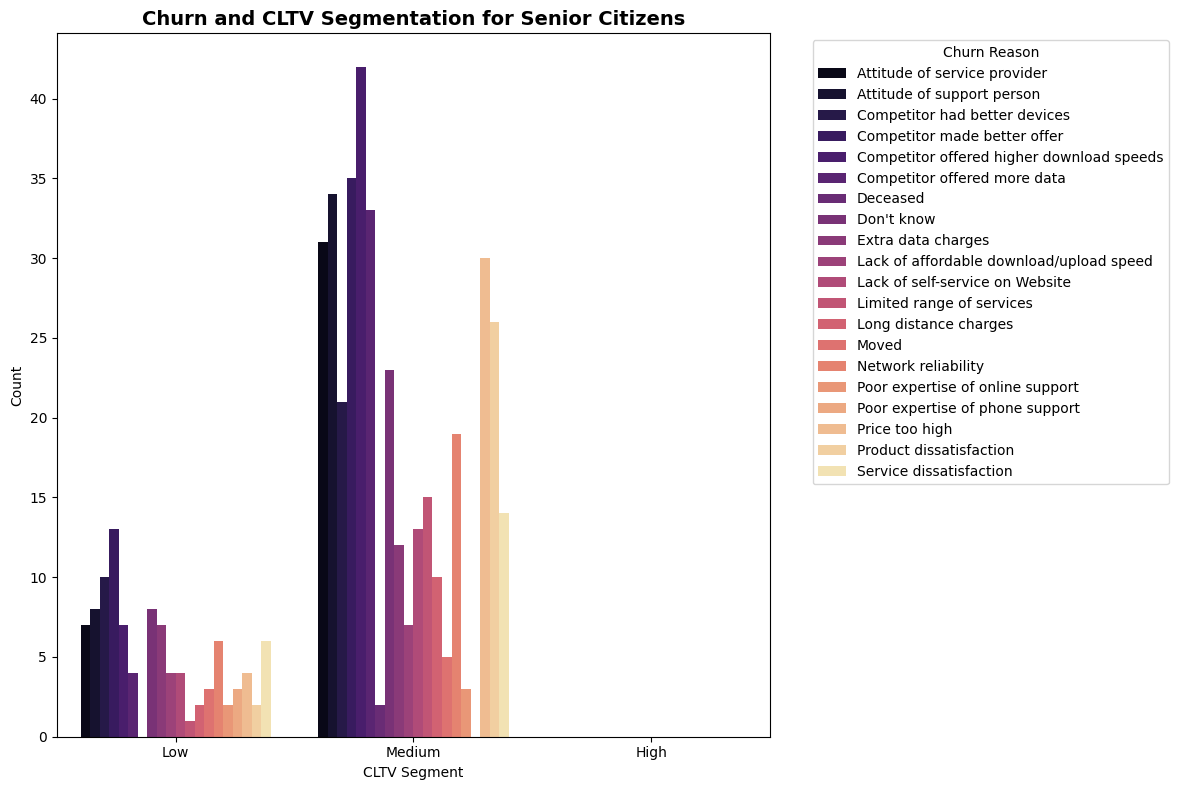

In [55]:
# Churn and CLTV for Senior Citizens
senior_churn_cltv = data[data['Senior Citizen'] == 'Yes'].groupby(['Churn Reason', 'CLTV Segment']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=senior_churn_cltv, x='CLTV Segment', y='Count', hue='Churn Reason', palette='magma')
plt.title("Churn and CLTV Segmentation for Senior Citizens", fontsize=14, fontweight='bold')
plt.xlabel('CLTV Segment')
plt.ylabel('Count')
plt.legend(title='Churn Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\viren\AppData\Local\Temp\ipykernel_34700\2676949980.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cltv_churn_service = data.groupby(['CLTV Segment', 'Churn Reason', 'Online Security']).size().reset_index(name='Count')


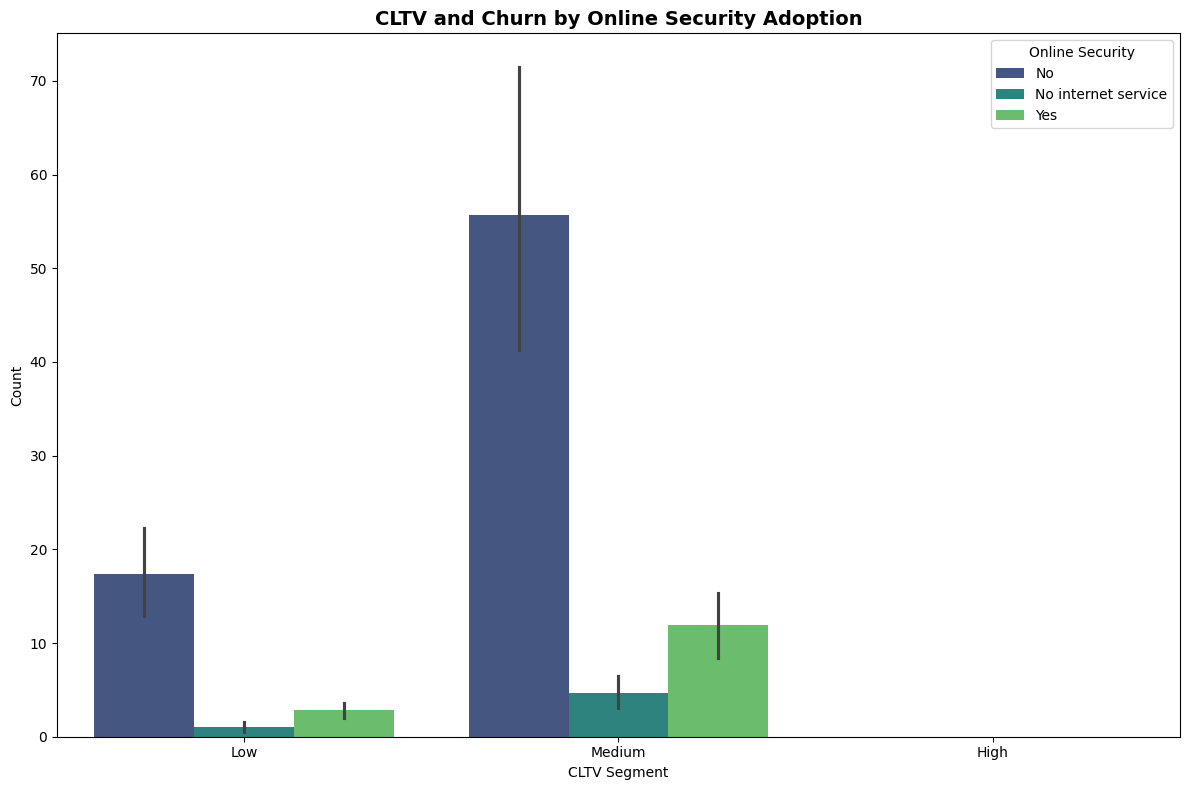

In [57]:
# CLTV vs Churn by Service Usage
cltv_churn_service = data.groupby(['CLTV Segment', 'Churn Reason', 'Online Security']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=cltv_churn_service, x='CLTV Segment', y='Count', hue='Online Security', palette='viridis')
plt.title("CLTV and Churn by Online Security Adoption", fontsize=14, fontweight='bold')
plt.xlabel('CLTV Segment')
plt.ylabel('Count')
plt.legend(title='Online Security')
plt.tight_layout()
plt.show()